# <center>Example pipeline of decoding_model_bids_fmri </center>
This notebook contains the example pipeline of decoding_model_bids. The pipeline leads you from .wav stimulus files and aligned fmri bold data to reconstruction accuracy of fitted decoding model.

## Project folder structure
The project assumes the following folder structure:
    /your_project_name/      
                      /code/audio2bidsstim/
                           /data_distribution/
                           /decoding/
                           
                      /raw data/stimuli/
                               /processed_stimuli/
                      /processed/
                      /lagged/
                      /decoding_data/

In the main directory of your project there shall be at 1 directory for code, 1 directory for raw data, 1 directory for preprocessed data and 1 directory for lagged data. 

In [5]:
%%bash 
cd /data/akitaitsev/data1/ 
ls -h

code
decoding_data
lagged
processed
raw_data


*The naming at this stage of work is a bit cumbersome and is likely to be changed and improved* 

- **raw_data**/stimuli contains wav_files you want to extract features from.

In [6]:
%%bash 
cd /data/akitaitsev/data1/raw_data/stimuli 
ls -h

0.wav
1.wav
2.wav
3.wav
4.wav
5.wav
6.wav
7.wav


- **raw_data**/processed_stimuli contains feature representations json files (parameters and metadata) produced by *wav_fiels_to_bids_tsv.py* called by *run_feature_extraction.sh*

In [7]:
%%bash 
cd /data/akitaitsev/data1/raw_data/processed_stimuli/ 
ls -h

task-aomovie_run-1_stim_description.json
task-aomovie_run-1_stim_mps.png
task-aomovie_run-1_stim_parameters.json
task-aomovie_run-1_stim_spectrogram.png
task-aomovie_run-1_stim.tsv.gz
task-aomovie_run-2_stim_description.json
task-aomovie_run-2_stim_mps.png
task-aomovie_run-2_stim_parameters.json
task-aomovie_run-2_stim_spectrogram.png
task-aomovie_run-2_stim.tsv.gz
task-aomovie_run-3_stim_description.json
task-aomovie_run-3_stim_mps.png
task-aomovie_run-3_stim_parameters.json
task-aomovie_run-3_stim_spectrogram.png
task-aomovie_run-3_stim.tsv.gz
task-aomovie_run-4_stim_description.json
task-aomovie_run-4_stim_mps.png
task-aomovie_run-4_stim_parameters.json
task-aomovie_run-4_stim_spectrogram.png
task-aomovie_run-4_stim.tsv.gz
task-aomovie_run-5_stim_description.json
task-aomovie_run-5_stim_mps.png
task-aomovie_run-5_stim_parameters.json
task-aomovie_run-5_stim_spectrogram.png
task-aomovie_run-5_stim.tsv.gz
task-aomovie_run-6_stim_description.json
task-aomovie_run-6_stim_mps.png
task-ao

- **processed/** is a BIDS compliant folder containing stimulus representation files for all frmi runs (wav fiels), fmri parameters file and folders for each subject. Note the naming convention of the stimulus and BOLD files.


In [11]:
%%bash 
cd /data/akitaitsev/data1/processed/ 
ls -h

sub-01
sub-02
sub-03
sub-04
sub-05
sub-06
sub-09
sub-10
sub-14
sub-15
sub-16
sub-17
sub-18
sub-19
sub-20
task-aomovie_bold.json
task-aomovie_run-1_stim.tsv.gz
task-aomovie_run-2_stim.tsv.gz
task-aomovie_run-3_stim.tsv.gz
task-aomovie_run-4_stim.tsv.gz
task-aomovie_run-5_stim.tsv.gz
task-aomovie_run-6_stim.tsv.gz
task-aomovie_run-7_stim.tsv.gz
task-aomovie_run-8_stim.tsv.gz


In each subject-specific folder there shall be bold data for all runs (preliminary aligned with stimulus data) saved in nii.gz format, and stimulus_description.json file for every stimulus file.  

In [14]:
%%bash 
cd /data/akitaitsev/data1/processed/sub-01
ls -h

sub-01_task-aomovie_run-1_bold.nii.gz
sub-01_task-aomovie_run-1_stim_description.json
sub-01_task-aomovie_run-2_bold.nii.gz
sub-01_task-aomovie_run-2_stim_description.json
sub-01_task-aomovie_run-3_bold.nii.gz
sub-01_task-aomovie_run-3_stim_description.json
sub-01_task-aomovie_run-4_bold.nii.gz
sub-01_task-aomovie_run-4_stim_description.json
sub-01_task-aomovie_run-5_bold.nii.gz
sub-01_task-aomovie_run-5_stim_description.json
sub-01_task-aomovie_run-6_bold.nii.gz
sub-01_task-aomovie_run-6_stim_description.json
sub-01_task-aomovie_run-7_bold.nii.gz
sub-01_task-aomovie_run-7_stim_description.json
sub-01_task-aomovie_run-8_bold.nii.gz
sub-01_task-aomovie_run-8_stim_description.json


- **lagged/** folder contains the preprocessed BOLD and stimulus representation files which will be used in decoding model.The directory contains folders for all analyzed subjects.
<br> Each subject folder contains preprocessed BOLD files stimulus files in tsv.gz format.

In [16]:
%%bash 
cd /data/akitaitsev/data1/lagged/sub-01
ls -h

sub-01_task-aomovie_run-1_bold.tsv.gz
sub-01_task-aomovie_run-2_bold.tsv.gz
sub-01_task-aomovie_run-3_bold.tsv.gz
sub-01_task-aomovie_run-4_bold.tsv.gz
sub-01_task-aomovie_run-5_bold.tsv.gz
sub-01_task-aomovie_run-6_bold.tsv.gz
sub-01_task-aomovie_run-7_bold.tsv.gz
sub-01_task-aomovie_run-8_bold.tsv.gz
task-aomovie_run-1_stim.tsv.gz
task-aomovie_run-2_stim.tsv.gz
task-aomovie_run-3_stim.tsv.gz
task-aomovie_run-4_stim.tsv.gz
task-aomovie_run-5_stim.tsv.gz
task-aomovie_run-6_stim.tsv.gz
task-aomovie_run-7_stim.tsv.gz
task-aomovie_run-8_stim.tsv.gz


- **decoding_data/** directory contains folders for each subject.
<br> Each subject folder contains output data of decoding model for each specifeid run of this subject. 

In [17]:
%%bash 
cd /data/akitaitsev/data1/decoding_data/
ls -h

sub-01


<br>
<br>
<br>
<br>

The pipeline is separated into 3 parts:

### 1. Auditory feature extraction from wav files (audio2bidsstim);
### 2. Distribution of stimulus and frmi files on folders according to BIDS standards (data_distribution);
### 3. Decoding - reconstruction of stimulus feature representation from preprocessed fmri data (decoding).
<br>
<br>
<br>

## 1. Auditory feature extraction (audio2bidsstim)

One of the good ways to achieve good decoding accuracy is to reconstruct not a sound time-series, but some sound representation. This representation will no longer contain sound time-series, but feature time-seires (derived from audiogram). Functions in this section accomodate 2 different feature extraction algorithms:<br> 
1. *Mel-spectrogram* calculation;
2. *Modulation power spectrum (MPS)* calculation

This section will briefly describe both methods with code examples, but later on we will work only with MPS.


*Here the general description of Mel-spectrogram and MPS will be some day*

Functions which perform the aforementioned feature extraction algorithms are contained in the *wav_files_to_bids_tsv_mps.py* python script. 


- **mps_stft** function calculates modulation power specterm of audio file (audio time-series) by calculating 2d FFT of spectrogram of sound file. User defines the length of stft sliding window in samples (*n_fft_stft*), the step size of sliding window in samples (*hop_length_mps*), and length of 2d fft sliding window aling the time dimension of the spectrogram in samples (*n_fft_mps*) as well as step size of this window (*hop_length_mps*). 
Let us call the function help to understand what other arguments of the function mean.

In [1]:
from audio2bidsstim.wav_files_to_bids_tsv_mps import mps_stft
help(mps_stft) 

Help on function mps_stft in module audio2bidsstim.wav_files_to_bids_tsv_mps:

mps_stft(filepath, sr, n_fft_stft, hop_length_stft, n_fft_mps, hop_length_mps, use_power=True, log=True, dB=False, plot_spectr=False, plot_mps=False, return_figures=False, cutoff_temp_mod=50, cutoff_spectr_mod=50, dec=2, **kwargs)
    Function to create modulation powermspectra from wav file via 2d FFT of STFT spectrogram.
    Function also saves its configuration to the output directory as json file
    
    Inputs:
        
    filepath -          path to the wav file
    sr -                sampling rate of wav file
    hop_length_stft -   step size for librosa stft
    n_fft_stft -        window size of stft
    n_fft_mps -         window size for 2d Fourier transform of spectrogram (along the time axis)
    hop_length_mps -    step size of 2d Fourier transform of spectrogram along the time axis
    use_power -         use power spectrum instead of amplitude (ampl^2). (default = True)
    log -          

As we can see, there are quite a few additional agruments user can specify. 
Let us breifly mention the role of each of these parameters.
- *use_power* flag tells the function whether to use power of the spectrogram for MPS calculation. If False, funciton will use amplitude;
- *log* flag tell the function whether to use logarithm of the spectrogram for MPS calculation. Spectrograms are ususally quite sparese for it is a common practice to use logarithm to "enhance" the difference in spectrogram time-series.
- *dB* label tells the function, whether to transform amplitude (or power) values of the spectrogram into dB scale.
  While it is the most common practice for analysing and visualizing spectrogram itself, for our purposes it is not so important.
- *plot_spectr* and *plot_mps* flags tell the function to return the pictures of the first spectrogram window and its corresponding MPS profile
- *return_figures* flag shall be used if you want the above figure handles to be returned by the fucntion as 4th and 5th outputs.
- *cutoff_temp_mod* and *cutoff_spectr_mod* denote the cutoff border of the temporal and spectral modulations for each MPS. We do not want to use too large modulations/s and modulations/Hz in our decoding model, as they would add a load of data not bearing so much information into the model.
- *key-value arguments* for librosa stft function can also be specified (e.g. change fourier transtorm calculation algorithm).

As is already mentioned in the description of the function, it is not possible to use logarithm and decibel representation of spectrogram at the same time. The reason for it is that dB already contain logaritm of spectrogram values.
<br>
Function returns 3 main outputs:
1. *MPS representation* - flattened MPS representations for every step of sliding window along spectrogram time-dimension as 2d numpy array of shape (times, n_features), where n_features is the number of elements in a single MPS array (n_features = mod/s*mod/Hz).
2. *Params* - dictionary containing all the parameters which were used for MPS calculation plus the shape of single original MPS representations (actually, tuple of (mod/s, mod/Hz)).
3. *Metadata* - python dictionary containing the information about feature representation, required by BIDS standard
   (feature names and repetition time between 2 feature representations).

If return_figures is True, there are also 2 figure handles returned.

Let us call mps_stft with exmample auditory file and feed it the follwoing parameters:


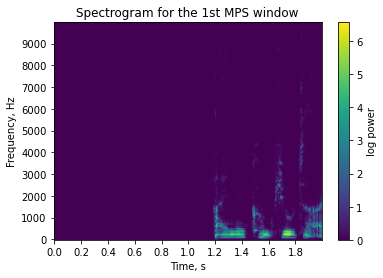

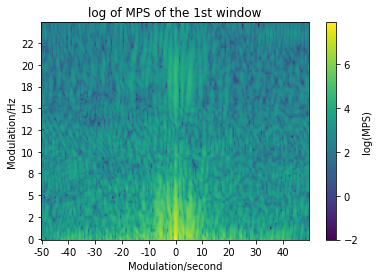

In [2]:
%matplotlib inline
config = {"filepath": "/data/akitaitsev/data1/raw_data/stimuli/0.wav",\
          "sr":20000, "n_fft_stft": 400, "hop_length_stft": 200,\
          "n_fft_mps": 200, "hop_length_mps": 200, "plot_spectr": True, \
          "use_power":True, "log":True, "dB":False, "plot_mps":True, \
          "return_figures": True}
MPS, params, metadata, fig_spectr, fig_mps = mps_stft(**config)

We can see, that spectrogram and its corresponding MPS look quite sane. In the end, this is the only purpose of these figures.
Now, let us examine the main outputs of the function.
Let's check the shape of MPS output:

In [5]:
print(MPS.shape)

(451, 20000)


This means, that given the parameters we have defined for mps_stft function, the output features will have 451 timepoints and 20000 features per timepoint.Note, that 20000 comes from mod/s * mod/Hz, which we can retrieve from *params* output. 

In [6]:
print(params["mps_shape"])

(100, 200)


You may also examine different fields of *params* and *metadata* outputs.

In practice it is easier to run fucntions which require quite a lot of parameters to be specifed with configuration files containing dictionaries with these parameters.
That's why when calling *wav_fiels_to_bids_tsv_mps.py* as main from the bash concole, the function requires to specify only the path to config dictionary saved in .json format.

In [9]:
%%bash
cd audio2bidsstim/
python wav_files_to_bids_tsv_mps.py -h

usage: wav_files_to_bids_tsv_mps.py [-h] [-e EXTRACTOR] [-c CONFIG]
                                    [-o OUTPUT]
                                    [-t START_TIME [START_TIME ...]]
                                    file [file ...]

Wav2bids stim converter.

positional arguments:
  file                  Name of file or space separated list of files or glob
                        expression for wav files to be converted.

optional arguments:
  -h, --help            show this help message and exit
  -e EXTRACTOR, --extractor EXTRACTOR
                        Type of feature extractor to use. mps or mel.
  -c CONFIG, --config CONFIG
                        Path to json file that contains the parameters to
                        librosa's melspectrogram function.
  -o OUTPUT, --output OUTPUT
                        Path to folder where to save tsv and json files, if
                        missing uses current folder.
  -t START_TIME [START_TIME ...], --start-time START_TIME [START_

So, to run feature extraction for a single file we shall just call the file wav_files_to_bids_tsv_mps.py and specify the path to stimulus file, extractor to use (MPS or mel-spectrogram), output folder and (for mel-spectrogram) start times. 

- **run_mps_feature_extraction.sh** allows you to use the abovementioned process of feature extraction with your own config file and folder structure quite easily. It contains the paths to input files, output folder and mps_config file. It executes wav_fiels_to_bids_tsv.py for every wav file and saves feature_representation,parameters and metadata to the output folder. In out case the output folder is 
<br> */data1/raw_data/processed_stimuli/*

In [ ]:
%%bash 
cd /data/akitaitsev/data1/code/audio2bidsstim/
vim run_mps_feature_exraction.sh

## 2. Distribution of stimulus and frmi files on folders according to BIDS standards (data_distribution)
This project is based on prerecorded and preprocessed (aligned) FMRI data. 
So, aligned FMRI data is assumed to be present somewhere on your computer.
This section describes functions which distribute FMRI aligned data and extracted stimulus representation from arbitrary folder to user-defined folder in compliance with BIDS standard.
There are two fucntions in this section.
- **copy_bold_to_bids_folder.py** distributes aligned FRMI BOLD data from arbitrary folder to the folder which will be fed to preprocessing functions from decoding section.

In [1]:
%%bash 
cd /data/akitaitsev/data1/code/data_distribution/
python copy_bold_to_bids_folder.py -h                                           

usage: copy_bold_to_bids_folder.py [-h] [-from FROM_DIR] [-to TO_DIR]

copy aomovoie bold files from aligned folder to your bids folder

optional arguments:
  -h, --help            show this help message and exit
  -from FROM_DIR, --from_dir FROM_DIR
  -to TO_DIR, --to_dir TO_DIR


As we can see the function syntax is very simple: it need the path to the aligned FMRI data folder and a path to your output folder.

- **distribute_stimulus_by_BIDS_folders.py** function does the same for stimulus: it copies stimulus representation files and metadata.json files to user-specified folder.

In [2]:
%%bash 
cd /data/akitaitsev/data1/code/data_distribution/
python distribute_stimulus_by_BIDS_folders.py -h              

usage: distribute_stimulus_by_BIDS_folders.py [-h] [-s STIMULI_DIR]
                                              [-b BIDS_DIR]

Distributer of precessed stimuli files by BIDS standard folders.

optional arguments:
  -h, --help            show this help message and exit
  -s STIMULI_DIR, --stimuli_dir STIMULI_DIR
                        directory where all the stimulus are saved by
                        run_mps_feature_extraction.sh script
  -b BIDS_DIR, --bids_dir BIDS_DIR
                        path to the bids directory


The sintux is the same as in the previous function: you only need to specify path to input directory (the directory to which run_feature_extraction.sh has written its output) and output directory (your BIDS compliant fodler).
*Note, that the output directory of both copy_bold_to_bids_folder and distribute_stimulus_by_BIDS_folders needs to be the same (so that both BOLD and stimulus data is there). 

In case of our project BOLD files and stimulus representation files were distributed to the */data1/processed/* directory. 

## 3. Decoding - reconstruction of stimulus feature representation from preprocessed fmri data (decoding).

Decoding is the core part of this project and it will be discussed in more details compared to the previous sections.
The */code/decoding/* directory contains quite a few scripts. Let us go through them one by one.